In [1]:
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Set Paths

In [3]:
data_dir = path.join("Homework Sample Data", "Homework 3")
try:
    os.makedirs(data_dir)
except OSError as err:
    print(err)

data_filename = 'StroopData.csv'
os.listdir(data_dir)

[Errno 17] File exists: 'Homework Sample Data/Homework 3'


['StroopData.csv']

## Load Data

Data Downloaded from http://opl.apa.org/Instructors/DownloadData.aspx

In [4]:
df = pd.read_csv(path.join(data_dir, data_filename))
df.head()

,ClassID,UserID,NumTrial,Condition,ColorORWord,WordDisplayed,ColorOfStimulus,ColorOfResponse,ReactionTime,Gender,Age
0,6110,156772,1,ConW,C,YELLOW,Y,Y,1389,M,26
1,6110,156772,2,ConW,C,GREEN,G,G,2043,M,26
2,6110,156772,3,ConW,C,RED,R,R,1389,M,26
3,6110,156772,4,ConW,C,YELLOW,Y,Y,1092,M,26
4,6110,156772,5,ConW,C,GREEN,G,G,1310,M,26


In all trials, all users had to respond with the color of the stimulus.

## Identify whether the color and meaning of the word matched or not

The Stroop Effect expects that trials where they don't match will have a longer reactoin time than the ones in which they do.

In [5]:
df['Correct'] = df['ColorOfResponse'] == df['ColorOfStimulus']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa686de0d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa686d30990>], dtype=object)

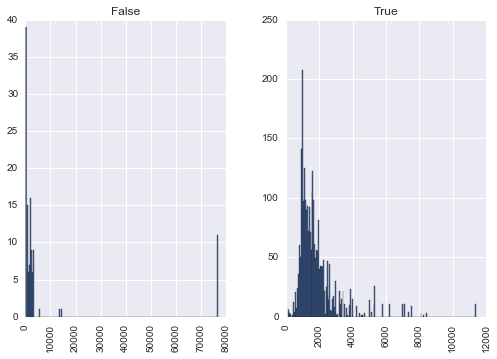

In [6]:
df.hist(column='ReactionTime', by='Correct', bins=200)

## Filter out any responses above 600 msecs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa686bac450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa686348310>], dtype=object)

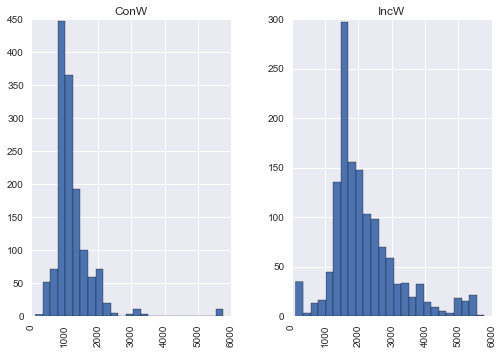

In [7]:
df_filt = df.loc[df['ReactionTime'] < 6000]
df_filt.hist(column='ReactionTime', by='Condition', bins=25)

## Filter out any trials where the color and word did not match

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa685d16690>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa685bc2ed0>], dtype=object)

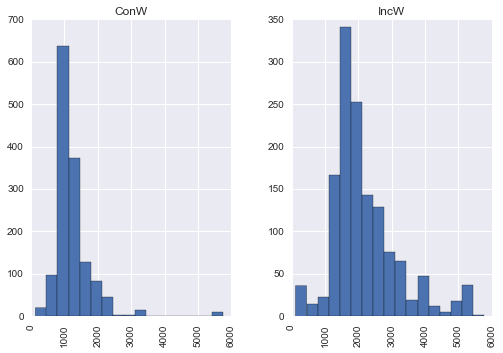

In [12]:
df_filt.hist(column='ReactionTime', by='Condition', bins=17)

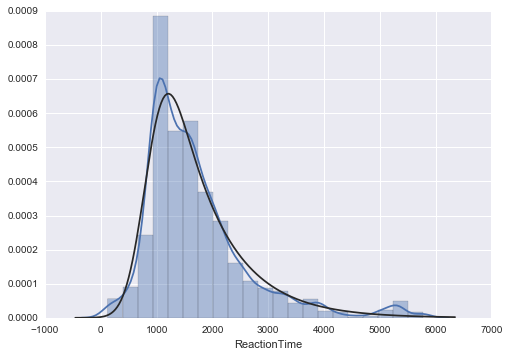

In [13]:
import scipy.stats as stats
sns.distplot(df_filt['ReactionTime'], fit=stats.exponnorm, bins=21)

## Convert DataFrames to 1D arrays

In [59]:
arrays = {}
arrays['trialnum'] = df_filt['NumTrial'].values
arrays['subject'] = df_filt['UserID'].values
arrays['stimword'] = np.array([x[0] for x in df_filt['WordDisplayed']])
arrays['stimcolor'] = df_filt['ColorOfStimulus'].values.astype(bytes)
arrays['respcolor'] = df_filt['ColorOfResponse'].values.astype(bytes)
arrays['reaction_time'] = df_filt['ReactionTime'].values


## Save 1D arrays as txt files

In [69]:
for varname in arrays:
    np.savetxt(path.join(data_dir, varname + '.txt'), 
               X=arrays[varname],
              fmt="%s")